In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/zakg04/Documents/HBC_lab/BOOST/Main/TaskLogic/data/test/test-7005/processed/LC/7005_LC_A.csv')
test = df[df['condition'] == 'test']
test

,acc_sum,block_c,block_dur,condition,correct,correct_response,countdown,datetime,endtime,project,...,start_end,starttime,stim1,stim2,subject_id,task,task_vers,time_test1,time_test2,trial
6,1,1,1.067,test,1,m,28932.999849,Fri Aug 02 2024 14:28:44 GMT-0500 (Central Day...,69082.8,O,...,1057.3,68025.5,HCF,RCF,7005,LC,A,64846.0,NaN,1
7,2,1,5.376,test,1,m,24623.999834,Fri Aug 02 2024 14:28:44 GMT-0500 (Central Day...,73390.8,O,...,4301.6,69089.2,QTPRJX,QTPNJX,7005,LC,A,65910.0,NaN,2
8,3,1,9.250,test,1,m,20750.000000,Fri Aug 02 2024 14:28:44 GMT-0500 (Central Day...,77265.6,O,...,3869.7,73395.9,MZDYGVGKQ,MZDYGLBKQ,7005,LC,A,70219.0,NaN,3
9,4,1,10.669,test,1,m,19330.999851,Fri Aug 02 2024 14:28:44 GMT-0500 (Central Day...,78684.6,O,...,1411.9,77272.7,FQTNMK,JQTNMK,7005,LC,A,74094.0,NaN,4
10,5,1,11.872,test,1,z,18128.000021,Fri Aug 02 2024 14:28:44 GMT-0500 (Central Day...,79887.0,O,...,1197.2,78689.8,CLJ,CLJ,7005,LC,A,75511.0,NaN,5
11,6,1,13.325,test,1,m,16674.999952,Fri Aug 02 2024 14:28:44 GMT-0500 (Central Day...,81340.2,O,...,1445.7,79894.5,JGDMNSVPW,JGZMNSVPW,7005,LC,A,76715.0,NaN,6
12,7,1,17.500,test,1,z,12500.000000,Fri Aug 02 2024 14:28:44 GMT-0500 (Central Day...,85515.0,O,...,4167.6,81347.4,FPTVHKCBJ,FPTVHKCBJ,7005,LC,A,78168.0,NaN,7
13,8,1,18.953,test,1,m,11046.999931,Fri Aug 02 2024 14:28:44 GMT-0500 (Central Day...,86968.2,O,...,1444.8,85523.4,XRPZBS,ZRPBDH,7005,LC,A,82344.0,NaN,8
14,9,1,20.539,test,1,m,9460.999966,Fri Aug 02 2024 14:28:44 GMT-0500 (Central Day...,88554.5,O,...,1578.9,86975.6,ZSQ,ZSP,7005,LC,A,83796.0,NaN,9
15,10,1,23.494,test,1,z,6505.999804,Fri Aug 02 2024 14:28:44 GMT-0500 (Central Day...,91509.6,O,...,2946.4,88563.2,MPZRXL,MPZRXL,7005,LC,A,85384.0,NaN,10


In [2]:
# get total responses that are not "None" by each block (1, 2)

block1 = test[test['block_c'] == 1]
block2 = test[test['block_c'] == 2]
count1 = 0
for i in range(len(block1)):
    if block1['response'].iloc[i] != 'None':
        count1 += 1
    
count2 = 0
for i in range(len(block2)):
    if block2['response'].iloc[i] != 'None':
        count2 += 1

total_responses = [[count1, len(block1)], [count2, len(block2)]]
total_responses





[[12, 13], [11, 12]]

In [3]:
# get total correct responses by each block (1, 2)
correct = [[block1['correct'].sum(), len(block1)], [block2['correct'].sum(), len(block2)]]
correct

[[12, 13], [9, 12]]

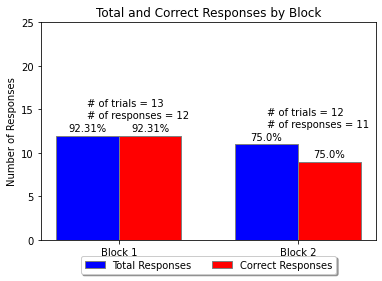

In [4]:
# plot total responses and correct responses by block, show the total number of trials for each block
fig, ax = plt.subplots()
barWidth = 0.35
r1 = np.arange(len(total_responses))
r2 = [x + barWidth for x in r1]
plt.bar(r1, [x[0] for x in total_responses], color='b', width=barWidth, edgecolor='grey', label='Total Responses')
plt.bar(r2, [x[0] for x in correct], color='r', width=barWidth, edgecolor='grey', label='Correct Responses')
plt.xlabel('Block')
plt.ylabel('Number of Responses')
plt.ylim(0, 25)
plt.title('Total and Correct Responses by Block')
plt.xticks([r + barWidth/2 for r in range(len(total_responses))], ['Block 1', 'Block 2'])
# show percentage of correct responses on each bar
for i in range(len(total_responses)):
    plt.text(r1[i], total_responses[i][0] + 0.5, str(round(correct[i][0]/total_responses[i][1] * 100, 2)) + '%', color='black', ha='center')
    plt.text(r2[i], correct[i][0] + 0.5, str(round(correct[i][0]/total_responses[i][1] * 100, 2)) + '%', color='black', ha='center')
#show total number of trials for each block
for i in range(len(total_responses)):
    plt.text(r1[i], total_responses[i][0] + 2, '# of trials = ' + str(total_responses[i][1]) + '\n' + '# of responses = ' + str(total_responses[i][0]), color='black', ha='left')
#move legend to below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()



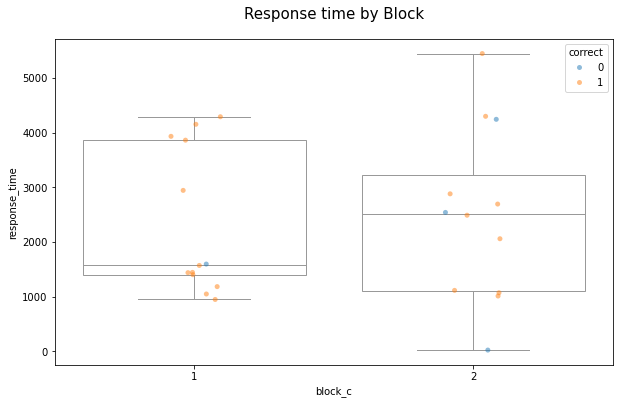

In [6]:
# creat a scatter plot of response time by block with boxes and whiskers showing mean and std
# rt
plt.figure(figsize=(10, 6))
sns.boxplot(x='block_c', y='response_time', data=test, showfliers=False, color='white')
sns.stripplot(x='block_c', y='response_time', data=test, alpha=0.5, jitter=True, hue='correct')
plt.title('Response time by Block', fontsize=15, pad=20, color="black")
plt.show()

plt.show()
